In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt

data_path = "\\".join(os.path.realpath('').split("\\")[0:-1])
data_path = os.path.join(data_path,"data")

try:
    races = pd.read_csv(data_path+"\\races.csv")
    quali = pd.read_csv(data_path+"\\qualifying.csv")
    results = pd.read_csv(data_path+"\\results.csv")
    sprints = pd.read_csv(data_path+"\\sprint_results.csv")
except Exception as e:
    print(str(e))

# Only seasons 2020,2021,2022 included

#### Teams names changes
* Renault-> Alpine F1 Team
* Racing Point -> Aston Martin

Racing Point 2020 Styria GP
Note - Following a protest lodged at the Styrian Grand Prix, Racing Point had 15 points deducted from their 2020 season total for the use of brake ducts, the development of which did not comply with the Sporting Regulations.<br> 
source : https://www.formula1.com/en/results.html/2020/races/1046/austria/race-result.html 

In [11]:
names = {"renault":"alpine","Renault":"Alpine F1 Team","racing_point":"aston_martin","Racing Point":"Aston Martin"}
quali.replace(names,inplace=True)
results.replace(names,inplace=True)
sprints.replace(names,inplace=True)


positionText “R” (retired), “D” (disqualified), “E” (excluded), “W” (withdrawn), “F” (failed to qualify) or “N” (not classified)

In [12]:
points_r = results[["season","round","position","positionText","points","grid","status","Driver_code","Driver_givenName","Driver_familyName","Constructor_name"]]
points_r.insert(0,"type","race")
points_s =  sprints[["season","round","position","positionText","points","grid","status","Driver_code","Driver_givenName","Driver_familyName","Constructor_name"]]
points_s.insert(0,"type","sprint")

points = pd.concat([points_r,points_s])
points.reset_index(inplace=True,drop=True)
points["Driver_name"] = points["Driver_givenName"] + " " + points["Driver_familyName"]
points


,type,season,round,position,positionText,points,grid,status,Driver_code,Driver_givenName,Driver_familyName,Constructor_name,Driver_name
0,race,2020,1,1,1,25.0,1,Finished,BOT,Valtteri,Bottas,Mercedes,Valtteri Bottas
1,race,2020,1,2,2,18.0,7,Finished,LEC,Charles,Leclerc,Ferrari,Charles Leclerc
2,race,2020,1,3,3,16.0,3,Finished,NOR,Lando,Norris,McLaren,Lando Norris
3,race,2020,1,4,4,12.0,5,Finished,HAM,Lewis,Hamilton,Mercedes,Lewis Hamilton
4,race,2020,1,5,5,10.0,8,Finished,SAI,Carlos,Sainz,McLaren,Carlos Sainz
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,sprint,2022,4,16,16,0.0,19,Finished,OCO,Esteban,Ocon,Alpine F1 Team,Esteban Ocon
1136,sprint,2022,4,17,17,0.0,17,Finished,GAS,Pierre,Gasly,AlphaTauri,Pierre Gasly
1137,sprint,2022,4,18,18,0.0,20,Finished,ALB,Alexander,Albon,Williams,Alexander Albon
1138,sprint,2022,4,19,19,0.0,18,Finished,LAT,Nicholas,Latifi,Williams,Nicholas Latifi


### Constructors standings

In [13]:
df = points.groupby(["season","Constructor_name"],as_index=False)[["points"]].agg(
    total_points = ("points","sum")
)
df
df = df.pivot(index = "Constructor_name",columns="season")

df[('total_points', 2020)].loc["Aston Martin"] = df[('total_points', 2020)].loc["Aston Martin"] - 15

df.insert(3,('rank', 2020),df[('total_points', 2020)].rank(ascending=False))
df.insert(4,('rank', 2021),df[('total_points', 2021)].rank(ascending=False))
df.insert(5,('rank', 2022),df[('total_points', 2022)].rank(ascending=False))
df.sort_values([('total_points', 2022)],ascending=False)


total_points                rank            
season                   2020   2021   2022  2020  2021  2022
Constructor_name                                             
Red Bull                319.0  585.5  431.0   2.0   2.0   1.0
Ferrari                 131.0  323.5  334.0   6.0   3.0   2.0
Mercedes                573.0  613.5  304.0   1.0   1.0   3.0
Alpine F1 Team          181.0  155.0   99.0   5.0   5.0   4.0
McLaren                 202.0  275.0   95.0   3.0   4.0   5.0
Alfa Romeo                8.0   13.0   51.0   8.0   9.0   6.0
Haas F1 Team              3.0    0.0   34.0   9.0  10.0   7.0
AlphaTauri              107.0  142.0   27.0   7.0   6.0   8.0
Aston Martin            195.0   77.0   20.0   4.0   7.0   9.0
Williams                  0.0   23.0    3.0  10.0   8.0  10.0

### Drivers standings

In [14]:
df = points.groupby(["season","Driver_name"],as_index=False)[["points"]].agg(
    total_points = ("points","sum")
)
df
df = df.pivot(index = "Driver_name",columns="season")


df.insert(3,('rank', 2020),df[('total_points', 2020)].rank(ascending=False))
df.insert(4,('rank', 2021),df[('total_points', 2021)].rank(ascending=False))
df.insert(5,('rank', 2022),df[('total_points', 2022)].rank(ascending=False))
df.sort_values([('total_points', 2022)],ascending=False)


total_points                rank            
season                     2020   2021   2022  2020  2021  2022
Driver_name                                                    
Max Verstappen            214.0  395.5  258.0   3.0   1.0   1.0
Charles Leclerc            98.0  159.0  178.0   8.0   7.0   2.0
Sergio Pérez              125.0  190.0  173.0   4.0   4.0   3.0
George Russell              3.0   16.0  158.0  18.0  15.0   4.0
Carlos Sainz              105.0  164.5  156.0   6.5   5.0   5.0
Lewis Hamilton            347.0  387.5  146.0   1.0   2.0   6.0
Lando Norris               97.0  160.0   76.0   9.0   6.0   7.0
Esteban Ocon               62.0   74.0   58.0  12.0  11.0   8.0
Valtteri Bottas           223.0  226.0   46.0   2.0   3.0   9.0
Fernando Alonso             NaN   81.0   41.0   NaN  10.0  10.0
Kevin Magnussen             1.0    NaN   22.0  20.0   NaN  11.0
Daniel Ricciardo          119.0  115.0   19.0   5.0   8.0  12.0
Pierre Gasly               75.0  110.0   16.0  10.5   9.0  13.5
Sebastian Vettel           33.0   43.0   16.0  13.0  12.0  13.5
Mick Schumacher             NaN    0.0   12.0   NaN  20.0  15.0
Yuki Tsunoda                NaN   32.0   11.0   NaN  14.0  16.0
Guanyu Zhou                 NaN    NaN    5.0   NaN   NaN  17.0
Lance Stroll               75.0   34.0    4.0  10.5  13.0  18.0
Alexander Albon           105.0    NaN    3.0   6.5   NaN  19.0
Nico Hülkenberg            10.0    NaN    0.0  15.0   NaN  20.5
Nicholas Latifi             0.0    7.0    0.0  22.0  17.0  20.5
Antonio Giovinazzi          4.0    3.0    NaN  16.5  18.0   NaN
Daniil Kvyat               32.0    NaN    NaN  14.0   NaN   NaN
Jack Aitken                 0.0    NaN    NaN  22.0   NaN   NaN
Kimi Räikkönen              4.0   10.0    NaN  16.5  16.0   NaN
Nikita Mazepin              NaN    0.0    NaN   NaN  20.0   NaN
Pietro Fittipaldi           0.0    NaN    NaN  22.0   NaN   NaN
Robert Kubica               NaN    0.0    NaN   NaN  20.0   NaN
Romain Grosjean             2.0    NaN    NaN  19.0   NaN   NaN

### WDC battle top 6 drivers

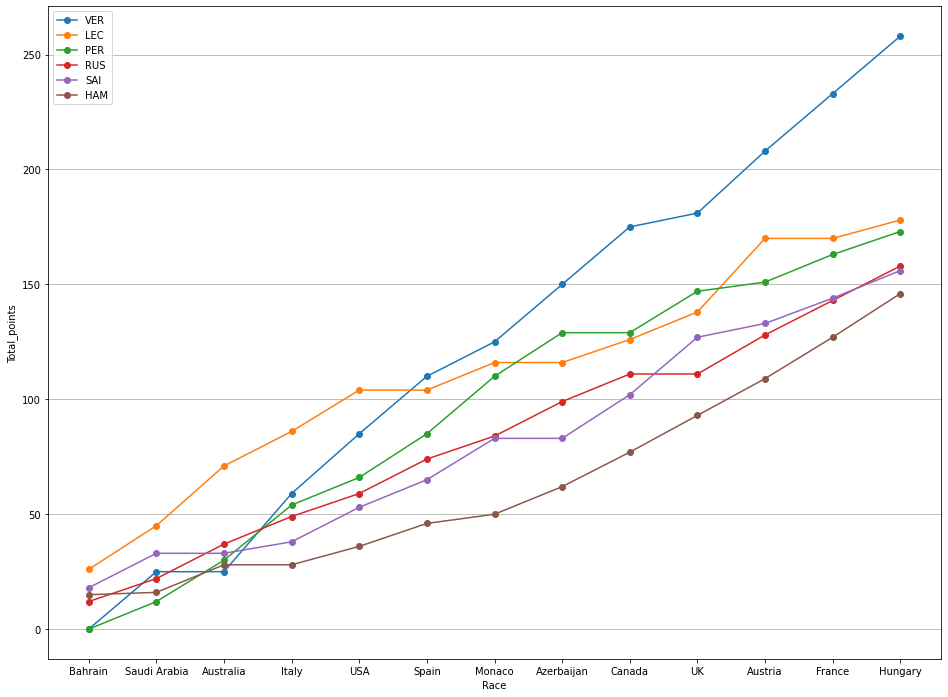

In [124]:

curr_year = pd.Timestamp.today().year
df_p = points[points["season"] == curr_year ].groupby(["round","Driver_code"],as_index=False)["points"].sum()
df_p["running_points"] = df_p.groupby("Driver_code",as_index=False)["points"].cumsum()

df_p_top6 = df_p[df_p["round"] == df_p["round"].nlargest(1).values[0]]
df_p_top6 = df_p_top6.sort_values(by = "running_points",ascending=False).head(6)["Driver_code"]

#dr = points["Driver_code"].drop_duplicates()
df_sr = pd.merge(races[races.season == curr_year][["round","Circuit_Location_country"]],df_p_top6,how="cross")
df_sr = pd.merge(df_sr,df_p,how="left",left_on=["round","Driver_code"], right_on=["round","Driver_code"])


df_sr[df_sr["Driver_code"] == "VER" ][["Circuit_Location_country","running_points"]].set_index("Circuit_Location_country")


plt.figure(figsize=(16,12))
plt.xlabel("Race")
plt.ylabel("Total_points")
for driver in df_p_top6.values:
    #print(driver)
    plt.plot(df_sr[df_sr["Driver_code"] == driver ][["Circuit_Location_country","running_points"]].set_index("Circuit_Location_country"),label = driver,linestyle = "solid",marker = "o",zorder = 2)

plt.legend()
plt.grid(axis = "y")
plt.show()



### Top 10 drivers with hightest average position

In [15]:
#positionText “R” (retired), “D” (disqualified), “E” (excluded), “W” (withdrawn), “F” (failed to qualify) or “N” (not classified)


def count_position(s,p):
    return s[s == p].count()

l = ["R","D","E","W","F","N"]
df = points[~points["positionText"].isin(l)].groupby("Driver_name")[["points","position"]].agg(
    total_points = ("points","sum"),
    races = ("points","count"),
    avg_finish = ("position","mean"),
    _1st = ("position",lambda x: count_position(x,1)),
    _2nd = ("position",lambda x: count_position(x,2)),
    _3th = ("position",lambda x: count_position(x,3))
)
df.sort_values("avg_finish").head(10)

,total_points,races,avg_finish,_1st,_2nd,_3th
Driver_name,,,,,,
Max Verstappen,867.5,48,2.291667,23,17,4
Lewis Hamilton,880.5,55,3.418182,19,12,7
Valtteri Bottas,495.0,50,5.700000,5,7,13
Charles Leclerc,435.0,48,5.750000,3,6,1
Carlos Sainz,425.5,50,5.840000,1,5,7
Sergio Pérez,488.0,49,5.918367,3,6,5
Lando Norris,333.0,54,7.222222,0,1,5
Daniel Ricciardo,253.0,54,8.462963,1,0,3
Esteban Ocon,194.0,49,8.877551,1,1,0


In [16]:
### Fastest lap in race vs quali (Q3)
# ft_race = results[results["FastestLap_rank"] == 1][["season","round","FastestLap_Time_time"]]
# ft_quali = quali[quali["position"]==1][["season","round","Q3"]]
# ft = pd.merge(ft_race,ft_quali,how="left",left_on=["season","round"], right_on=["season","round"])
# ft = pd.merge(ft,races[["season","round","raceName"]],how="left",left_on=["season","round"], right_on=["season","round"])
# ft["FastestLap_Time_time_dt"] = pd.to_datetime(ft["FastestLap_Time_time"],format="%M:%S.%f")
# ft["Q3_dt"] = pd.to_datetime(ft["Q3"],format="%M:%S.%f")
# ft["dt_diff"] = ft["Q3_dt"] - ft["FastestLap_Time_time_dt"]
# ft["dt_diff2"] = ft["dt_diff"].dt.total_seconds()
# ft
